In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


- cntry - Country
- year - ESS round (6 - 2012; 7 - 2014)
- idno - Respondent's identification number
- tvtot - TV watching, total time on average weekday
- ppltrst - Most people can be trusted or you can't be too careful
- pplfair - Most people try to take advantage of you, or try to be fair
- pplhlp - Most of the time people helpful or mostly looking out for themselves
- happy - How happy are you
- sclmeet - How often socially meet with friends, relatives or colleagues
- sclact - Take part in social activities compared to others of same age
- gndr - Gender
- agea - Age of respondent, calculated
- partner - Lives with husband/wife/partner at household grid

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


In [15]:
df.dropna(inplace=True)

1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3) Who reported watching more TV in 2012, men or women?

4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

### 1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [18]:
#changing values of 6 and 7 into 2012 and 2014
df['year'] = np.where(df['year'] == 6, 2012, 2014)

In [30]:
year_2012 = df[df['year'] == 2012][['ppltrst', 'cntry']]

In [117]:
year_2014 = df[df['year'] == 2014][['ppltrst', 'cntry']]

In [32]:
country = df.cntry.unique()

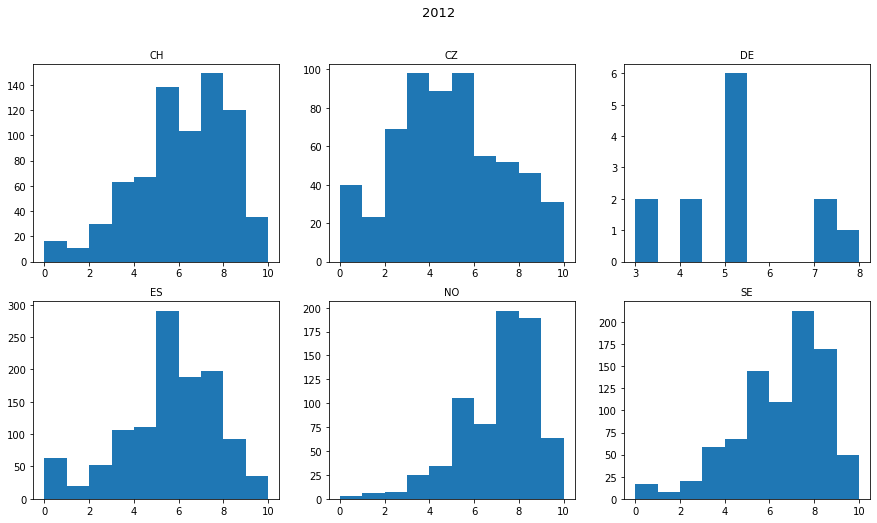

In [115]:
plt.figure(figsize=(15,8))
plt.suptitle('2012', size=13)
idx = 1
for i in country:
    
    to_plot = year_2012['ppltrst'][year_2012['cntry'] == i]
    plt.subplot(2,3,idx)
    plt.title(i, size=10)
    plt.hist(to_plot)
    
    
    idx += 1

plt.show()

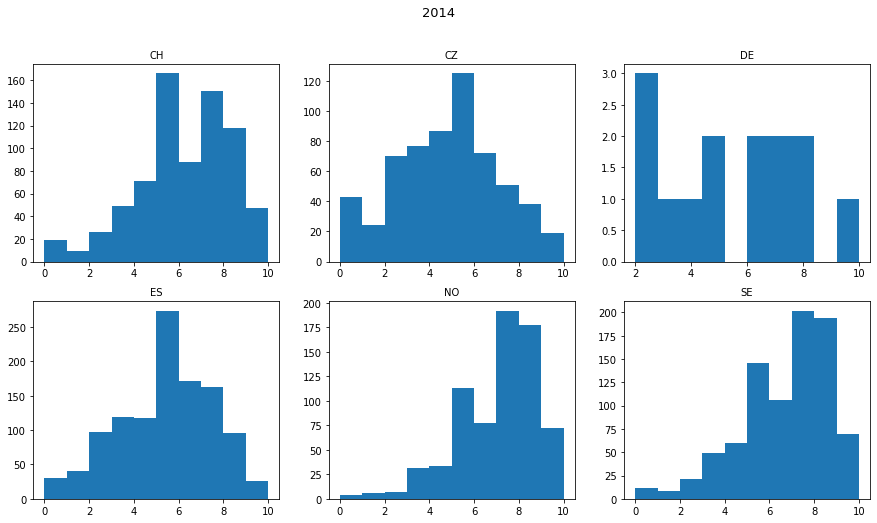

In [119]:
plt.figure(figsize=(15,8))
plt.suptitle('2014', size=13)
idx = 1
for i in country:
    
    to_plot = year_2014['ppltrst'][year_2014['cntry'] == i]
    plt.subplot(2,3,idx)
    plt.title(i, size=10)
    plt.hist(to_plot)
    
    
    idx += 1

plt.show()

In [81]:
year_2012_cntry = df[df['year'] == 2012][['ppltrst', 'cntry']].groupby(by = 'cntry')

In [84]:
year_2014_cntry = df[df['year'] == 2014][['ppltrst', 'cntry']].groupby(by = 'cntry')

In [103]:
pd.concat([year_2012_cntry.mean(), year_2014_cntry.mean()], axis=1)


,ppltrst,ppltrst
cntry,,
CH,5.685792,5.764468
CZ,4.402662,4.356436
DE,5.076923,5.357143
ES,5.127807,4.940035
NO,6.648305,6.599719
SE,6.043073,6.239908


In [95]:
df[df['year'] == 2012][['ppltrst', 'cntry']].mean()

ppltrst    5.578482
dtype: float64

In [96]:
df[df['year'] == 2014][['ppltrst', 'cntry']].mean()

ppltrst    5.571394
dtype: float64

in average the trust in 2012 is little bit higher. 

In [129]:
df[df['year'] == 2012][['ppltrst']]

,ppltrst
0,3.0
1,5.0
2,8.0
3,6.0
4,6.0
...,...
7681,5.0
7682,3.0
7683,6.0
7684,6.0


In [130]:
stats.kruskal(df[df['year'] == 2012][['ppltrst']], 
              df[df['year'] == 2014][['ppltrst']])

KruskalResult(statistic=0.11927994139654356, pvalue=0.7298167669759283)

It appears that the groups do not differ significantly.

In [134]:
for i in country:
    
    print(i, stats.kruskal(df[df['year'] == 2012]['ppltrst'][year_2012['cntry'] == i], 
                 df[df['year'] == 2014]['ppltrst'][year_2014['cntry'] == i]))
    

CH KruskalResult(statistic=0.3211329972268854, pvalue=0.5709275494134165)
CZ KruskalResult(statistic=3.397334444818437e-05, pvalue=0.9953494239190417)
DE KruskalResult(statistic=0.11943127962085082, pvalue=0.7296521329635768)
ES KruskalResult(statistic=6.254399514712144, pvalue=0.012388523566141176)
NO KruskalResult(statistic=0.20681671394808315, pvalue=0.649273954856751)
SE KruskalResult(statistic=4.486790845114948, pvalue=0.03415774143761488)


### 2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [135]:
def did_peplpe_become(parametr):
    year_2012 = df[df['year'] == 2012][[parametr, 'cntry']]
    year_2014 = df[df['year'] == 2014][[parametr, 'cntry']]
    country = df.cntry.unique()
    plt.figure(figsize=(15,8))
    plt.suptitle('2012', size=13)
    idx = 1
    for i in country:
    
        to_plot = year_2012[parametr][year_2012['cntry'] == i]
        plt.subplot(2,3,idx)
        plt.title(i, size=10)
        plt.hist(to_plot)
    
    
        idx += 1

    plt.show()
    plt.figure(figsize=(15,8))
    plt.suptitle('2014', size=13)
    idx = 1
    for i in country:
    
        to_plot = year_2014[parametr][year_2014['cntry'] == i]
        plt.subplot(2,3,idx)
        plt.title(i, size=10)
        plt.hist(to_plot)
    
    
        idx += 1

    plt.show()
    
    year_2012_cntry = df[df['year'] == 2012][[parametr, 'cntry']].groupby(by = 'cntry')
    year_2014_cntry = df[df['year'] == 2014][[parametr, 'cntry']].groupby(by = 'cntry')
    print(pd.concat([year_2012_cntry.mean(), year_2014_cntry.mean()], axis=1))
    
    print(df[df['year'] == 2012][[parametr, 'cntry']].mean())
    (df[df['year'] == 2014][[parametr, 'cntry']].mean())
    
    print('stats.kruskal: ', stats.kruskal(df[df['year'] == 2012][['ppltrst']], 
              df[df['year'] == 2014][['ppltrst']]))
    
    
    for i in country:
    
        print('stats.kruskal: ', i, stats.kruskal(df[df['year'] == 2012]['ppltrst'][year_2012['cntry'] == i], 
                 df[df['year'] == 2014]['ppltrst'][year_2014['cntry'] == i]))

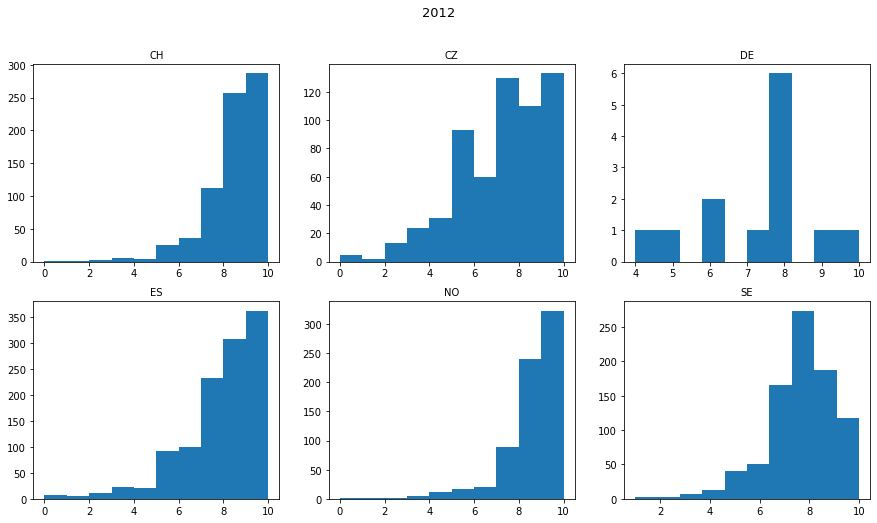

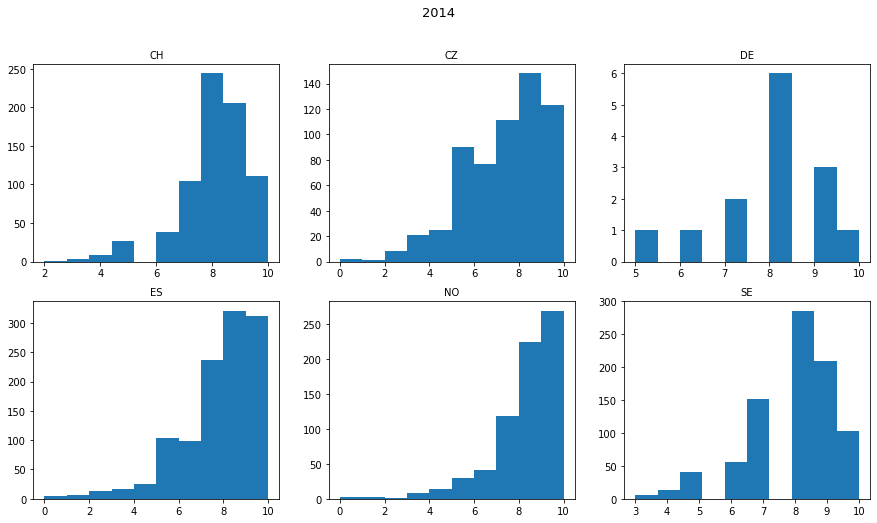

          happy     happy
cntry                    
CH     8.083333  8.142665
CZ     6.790349  6.922442
DE     7.307692  7.857143
ES     7.557858  7.450617
NO     8.252825  7.919944
SE     7.901048  7.938870
happy    7.731516
dtype: float64
stats.kruskal:  KruskalResult(statistic=0.11927994139654356, pvalue=0.7298167669759283)
stats.kruskal:  CH KruskalResult(statistic=0.3211329972268854, pvalue=0.5709275494134165)
stats.kruskal:  CZ KruskalResult(statistic=3.397334444818437e-05, pvalue=0.9953494239190417)
stats.kruskal:  DE KruskalResult(statistic=0.11943127962085082, pvalue=0.7296521329635768)
stats.kruskal:  ES KruskalResult(statistic=6.254399514712144, pvalue=0.012388523566141176)
stats.kruskal:  NO KruskalResult(statistic=0.20681671394808315, pvalue=0.649273954856751)
stats.kruskal:  SE KruskalResult(statistic=4.486790845114948, pvalue=0.03415774143761488)


In [136]:
did_peplpe_become('happy')

### 3) Who reported watching more TV in 2012, men or women?

In [138]:
df['gndr'] = ['Male' if v == 1.0 else 'Female' for v in df.gndr.values]

In [149]:
import seaborn as sns

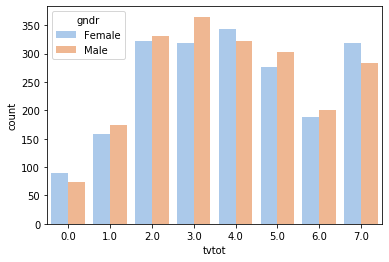

In [153]:
sns.countplot(x=df[df['year']== 2012]['tvtot'], hue = df['gndr'], palette="pastel")

### 4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [154]:
df[['pplfair', 'partner']]

,pplfair,partner
0,10.0,1.0
1,7.0,1.0
2,8.0,2.0
3,6.0,1.0
4,7.0,1.0
...,...,...
8589,5.0,2.0
8590,4.0,2.0
8591,7.0,2.0
8592,8.0,2.0


In [155]:
df.partner.unique()

array([1., 2.])

In [156]:
df['partner'] = ['Partner' if i == 1.0 else 'Single' for i in df.partner.values]

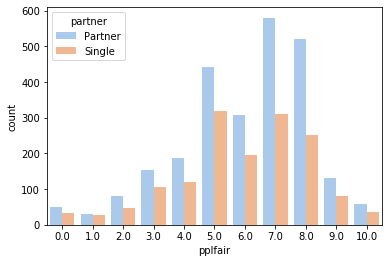

In [157]:
sns.countplot(x=df[df['year']== 2012]['pplfair'], hue = df['partner'], palette="pastel")

In [160]:
partner = df['pplfair'][(df['year']== 2012) & (df.partner == 'Partner')]
single = df['pplfair'][(df['year']== 2012) & (df.partner == 'Single')]


In [161]:
partner.mean()

6.0743509047993705

In [162]:
single.mean()

5.86592544146501

### 5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

### 6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?